In [2]:
import os

In [3]:
os.chdir("E:/nft_bank 분석과제/nftbank_loan/dataset_0")
print(os.getcwd())

E:\nft_bank 분석과제\nftbank_loan\dataset_0


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import sklearn.metrics
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

## NFT 자산의 대출이 점점 활성화 되어가고 있으며, 한 예로써, NFT뱅크의 파트너사 NFTfi.com 에서는 다양한 NFT 자산을 담보로 P2P 대출이 이루어지고 있습니다. NFT뱅크 이런 기업들을 대상으로 담보 대출의 상환 가능성에 대한 정보를 제공합니다.

## 평가지표 : AUROC


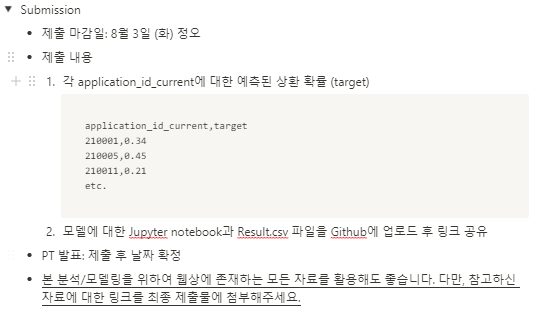

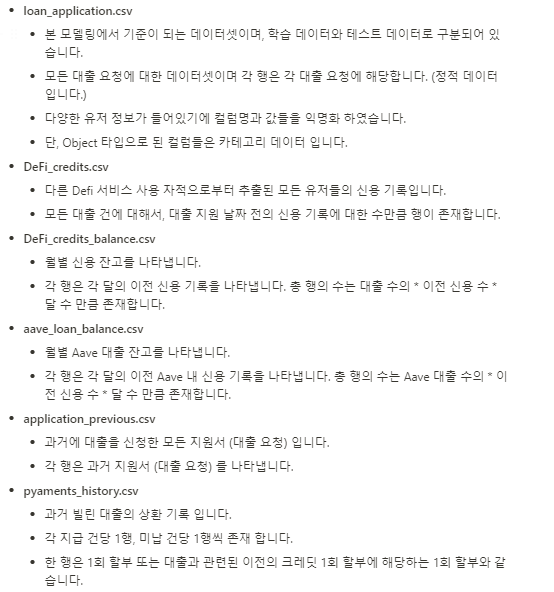

In [5]:
loan_application=pd.read_csv('loan_application.csv')
defi_credits=pd.read_csv('defi_credits.csv')
defi_credits_balance=pd.read_csv('defi_credits_balance.csv')
aave_loan_balance=pd.read_csv('aave_loan_balance.csv')
application_previous=pd.read_csv('application_previous.csv')
payments_history=pd.read_csv('payments_history.csv')

In [5]:
loan_application

,application_id_current,target,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,type
0,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,3,1,8,6,5,2,0,5,0,1
1,100003,0.0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,1,1,3,1,39,2,0,0,0,1
2,100004,0.0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,3,1,8,1,11,4,3,7,2,1
3,100006,0.0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,1,8,6,5,4,3,7,2,1
4,100007,0.0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,3,1,3,4,37,4,3,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,NaN,0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970,-5169,...,5,1,18,6,33,4,3,7,2,0
48740,456222,NaN,2,157500.0,622413.0,31909.5,495000.0,0.035792,-11186,-1149,...,1,1,14,1,51,4,3,7,2,0
48741,456223,NaN,1,202500.0,315000.0,33205.5,315000.0,0.026392,-15922,-3037,...,1,1,18,6,5,4,0,5,0,0
48742,456224,NaN,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731,...,1,1,10,1,42,4,0,4,0,0


In [6]:
loan_application[loan_application['target']==1]

,application_id_current,target,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,type
0,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,3,1,8,6,5,2,0,5,0,1
26,100031,1.0,0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724,-2628,...,5,1,2,1,5,4,0,6,1,1
40,100047,1.0,0,202500.0,1193580.0,35028.0,855000.0,0.025164,-17482,-1262,...,1,1,8,5,5,1,0,5,0,1
42,100049,1.0,0,135000.0,288873.0,16258.5,238500.0,0.007305,-13384,-3597,...,0,1,14,4,42,4,3,7,2,1
81,100096,1.0,0,81000.0,252000.0,14593.5,252000.0,0.028663,-24794,365243,...,1,1,18,4,57,4,3,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1.0,1,207000.0,450000.0,32746.5,450000.0,0.020246,-9918,-3048,...,1,1,8,1,5,2,0,5,0,1
307475,456215,1.0,1,144000.0,1303200.0,46809.0,1125000.0,0.007330,-13416,-2405,...,0,1,8,4,7,4,0,4,0,1
307481,456225,1.0,0,225000.0,297000.0,19975.5,297000.0,0.008575,-20644,-3147,...,1,1,10,0,5,4,3,7,2,1
307489,456233,1.0,0,225000.0,521280.0,23089.5,450000.0,0.014464,-16471,-286,...,0,1,14,0,5,2,0,5,1,1


In [7]:
loan_application[loan_application['target']==0]

,application_id_current,target,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,type
1,100003,0.0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,1,1,3,1,39,2,0,0,0,1
2,100004,0.0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,3,1,8,1,11,4,3,7,2,1
3,100006,0.0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,1,8,6,5,4,3,7,2,1
4,100007,0.0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,3,1,3,4,37,4,3,7,2,1
5,100008,0.0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,1,1,8,6,33,4,3,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0.0,0,112500.0,225000.0,22050.0,225000.0,0.022800,-24384,365243,...,3,1,18,1,57,2,0,4,0,1
307506,456251,0.0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,2,5,14,4,43,2,0,5,0,1
307507,456252,0.0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,5,1,18,1,57,2,0,5,0,1
307508,456253,0.0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,2,1,10,4,39,2,0,4,0,1


## target 값에 imbalanced존재 -> under sampling, over sampling(피쳐에 object형이 있으므로 거리기반의 SMOTE,ADASYN는 사용할 수 없음), Cost sensitive learning, Optimal Threshold for ROC Curve 등 사용

## <nan 값 처리>
중앙값으로 처리, 결측이 70% 이상 되는 열은 버리기

##   < feature selection>
1. pca한거만으로 성능평가

2. pca한 피쳐추가한걸로 릿지, 라쏘, 엘라스틱넷 한걸로 성능평가

3. 릿지, 라쏘후 pca한걸로 성능평가 

-> 가장 좋은걸 base 라인을 삼음

## <imbalance 해소>

1. under sampling, over sampling(피쳐에 object형이 있으므로 거리기반의 SMOTE,ADASYN는 사용할 수 없음)

-> object얼마나 있나 확인-> 임베딩 시킬건지 버릴건지 확인

-> 임베딩 시키면 오버샘플링으로 ADASYN 적용가능 -> high demensional하기 때문에 안좋을 수 있음


-> base model : random forest, lgbm

2.Optimal Threshold for ROC Curve 등 사용

3. Cost sensitive learning 

4. under 여러번해서 앙상블

-> 가장 좋은걸 선택

## <파리미터 튜닝>



In [8]:
defi_credits

,application_id_current,defi_id,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,amt_annuity,credit_active,credit_currency,credit_type
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,-131,NaN,2,0,3
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,-20,NaN,0,0,4
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,-16,NaN,0,0,3
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,-16,NaN,0,0,4
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,-21,NaN,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,-19,NaN,0,0,10
1716424,100044,5057754,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,-2493,NaN,2,0,3
1716425,100044,5057762,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,-967,NaN,2,0,3
1716426,246829,5057770,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,-1508,NaN,2,0,3


In [9]:
defi_credits[defi_credits['defi_id']==5715448]

,application_id_current,defi_id,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,amt_annuity,credit_active,credit_currency,credit_type
768,380361,5715448,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,-183,0.0,0,0,4


In [10]:
defi_credits_balance

,defi_id,months_balance,status
0,5715448,0,6
1,5715448,-1,6
2,5715448,-2,6
3,5715448,-3,6
4,5715448,-4,6
...,...,...,...
27299920,5041336,-47,7
27299921,5041336,-48,7
27299922,5041336,-49,7
27299923,5041336,-50,7


In [11]:
defi_credits_balance[defi_credits_balance['months_balance']==-1]

,defi_id,months_balance,status
1,5715448,-1,6
28,5715449,-1,6
66,5715452,-1,6
99,5715453,-1,6
241,5715457,-1,7
...,...,...,...
27299250,5018308,-1,6
27299487,5025218,-1,6
27299692,5041141,-1,6
27299800,5041172,-1,6


In [12]:
defi_credits_balance[defi_credits_balance['defi_id']==5715448]

,defi_id,months_balance,status
0,5715448,0,6
1,5715448,-1,6
2,5715448,-2,6
3,5715448,-3,6
4,5715448,-4,6
5,5715448,-5,6
6,5715448,-6,6
7,5715448,-7,6
8,5715448,-8,6
9,5715448,-9,0


In [13]:
defi_credits_balance.describe() 

,defi_id,months_balance,status
count,2.729992e+07,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01,4.513079e+00
std,4.923489e+05,2.386451e+01,2.851864e+00
min,5.001709e+06,-9.600000e+01,0.000000e+00
25%,5.730933e+06,-4.600000e+01,0.000000e+00
50%,6.070821e+06,-2.500000e+01,6.000000e+00
75%,6.431951e+06,-1.100000e+01,6.000000e+00
max,6.842888e+06,0.000000e+00,7.000000e+00


In [14]:
min(defi_credits_balance['months_balance'])

-96

In [15]:
aave_loan_balance 

,application_id_previous,application_id_current,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,...,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,sk_dpd,sk_dpd_def,name_contract_status
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,0,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,0,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,0,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,0,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,0,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,0,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,0,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,0,0,0


In [16]:
aave_loan_balance[aave_loan_balance['application_id_previous']==2562384]

,application_id_previous,application_id_current,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,...,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,sk_dpd,sk_dpd_def,name_contract_status
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,0,0,0
122799,2562384,378907,-30,45328.320,270000,0.0,0.000,0.0,0.000,2332.035,...,45670.275,45670.275,0.0,0,0.0,0.0,18.0,0,0,0
153474,2562384,378907,-8,129.240,135000,0.0,22005.000,0.0,22005.000,2250.000,...,0.000,0.000,0.0,1,0.0,1.0,33.0,0,0,0
330701,2562384,378907,-2,28.575,9000,0.0,0.000,0.0,0.000,1916.910,...,28.575,28.575,0.0,0,0.0,0.0,39.0,0,0,0
419198,2562384,378907,-12,0.000,45000,0.0,0.000,0.0,0.000,0.000,...,0.000,0.000,0.0,0,0.0,0.0,29.0,0,0,0
561468,2562384,378907,-39,56570.940,270000,0.0,0.000,0.0,0.000,2761.740,...,56570.940,56570.940,0.0,0,0.0,0.0,9.0,6,6,0
577279,2562384,378907,-27,43030.845,270000,0.0,0.000,0.0,0.000,2250.000,...,43360.290,43360.290,0.0,0,0.0,0.0,21.0,0,0,0
596084,2562384,378907,-19,0.000,45000,0.0,0.000,0.0,0.000,281.475,...,0.000,0.000,0.0,0,0.0,0.0,29.0,0,0,0
722949,2562384,378907,-13,0.000,45000,0.0,0.000,0.0,0.000,0.000,...,0.000,0.000,0.0,0,0.0,0.0,29.0,0,0,0
889286,2562384,378907,-17,0.000,45000,0.0,0.000,0.0,0.000,0.000,...,0.000,0.000,0.0,0,0.0,0.0,29.0,0,0,0


In [17]:
aave_loan_balance.describe()

,application_id_previous,application_id_current,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,...,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,sk_dpd,sk_dpd_def,name_contract_status
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01,8.616930e-02
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01,4.869544e-01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03,6.000000e+00


In [18]:
min(aave_loan_balance['months_balance'])

-96

In [19]:
application_previous

,application_id_previous,application_id_current,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,hour_appr_process_start,nflag_last_appl_in_day,rate_down_payment,...,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,name_seller_industry,name_yield_group,product_combination
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,1,0.000000,...,7,7,2,19,3,0,4,2,4,13
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,1,NaN,...,7,6,2,27,2,2,3,10,2,7
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,1,NaN,...,7,5,2,27,2,2,5,10,1,6
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,1,NaN,...,7,7,2,27,2,2,5,10,4,8
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,1,NaN,...,1,7,2,27,2,1,5,10,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,14704.290,267295.5,311400.0,0.0,267295.5,12,1,0.000000,...,7,7,1,11,3,0,7,5,3,11
1670210,2357031,334635,6622.020,87750.0,64291.5,29250.0,87750.0,15,1,0.340554,...,7,6,0,11,3,0,7,5,4,11
1670211,2659632,249544,11520.855,105237.0,102523.5,10525.5,105237.0,12,1,0.101401,...,7,5,2,7,3,0,4,4,3,9
1670212,2785582,400317,18821.520,180000.0,191880.0,NaN,180000.0,9,1,NaN,...,7,1,2,27,2,2,0,10,3,7


In [20]:
application_previous[application_previous['application_id_previous']==2562384]

,application_id_previous,application_id_current,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,hour_appr_process_start,nflag_last_appl_in_day,rate_down_payment,...,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,name_seller_industry,name_yield_group,product_combination
756786,2562384,378907,13500.0,0.0,270000.0,NaN,NaN,8,1,NaN,...,7,7,2,27,0,2,5,10,0,1


In [21]:
payments_history

,application_id_previous,application_id_current,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [22]:
payments_history[payments_history['application_id_previous']==2562384]

,application_id_previous,application_id_current,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
7640824,2562384,378907,0.0,42,-821.0,-822.0,2250.000,2250.000
7741051,2562384,378907,0.0,18,-1187.0,-1181.0,2761.740,2761.740
7748571,2562384,378907,0.0,14,-1247.0,-1247.0,233.550,233.550
7830654,2562384,378907,0.0,31,-1006.0,-1006.0,344.385,344.385
7995960,2562384,378907,0.0,34,-944.0,-946.0,2369.295,2369.295
...,...,...,...,...,...,...,...,...
11094485,2562384,378907,0.0,15,-1218.0,-1219.0,3089.925,3089.925
11110226,2562384,378907,0.0,48,-701.0,-701.0,2250.000,2250.000
11329838,2562384,378907,0.0,27,-1065.0,-1065.0,198.990,198.990
11352964,2562384,378907,0.0,72,-153.0,-153.0,840.780,840.780


In [23]:
payments_history.sort_values(by=['num_instalment_number'],axis=0)

,application_id_previous,application_id_current,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
4101024,2396722,276351,1.0,1,-25.0,-43.0,15062.670,15062.670
11407068,1103118,381900,1.0,1,-585.0,-593.0,9050.940,9050.940
7887340,2252978,301059,1.0,1,-959.0,-962.0,41014.080,41014.080
12528058,1661124,427016,1.0,1,-1111.0,-1141.0,26563.680,26563.680
6222838,2730175,205418,1.0,1,-1268.0,-1282.0,15627.150,15627.150
...,...,...,...,...,...,...,...,...
13007832,2360056,453103,0.0,274,-117.0,-128.0,5625.000,5625.000
4118572,2592574,217360,0.0,275,-20.0,-20.0,685.395,685.395
12957238,2360056,453103,0.0,275,-86.0,-95.0,5625.000,5625.000
13505870,2360056,453103,0.0,276,-56.0,-73.0,5625.000,5625.000


In [24]:
payments_history[payments_history['application_id_previous']==2562384].sort_values(by=['num_instalment_number'],axis=0)

,application_id_previous,application_id_current,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
9378271,2562384,378907,0.0,1,-1432.0,-1439.0,3498.975,3498.975
10524552,2562384,378907,0.0,2,-1439.0,-1439.0,1001.025,1001.025
9504324,2562384,378907,0.0,3,-1402.0,-1400.0,3399.795,3399.795
10204693,2562384,378907,0.0,4,-1400.0,-1400.0,200.205,200.205
10416365,2562384,378907,0.0,5,-1371.0,-1371.0,3346.695,3346.695
...,...,...,...,...,...,...,...,...
8551545,2562384,378907,0.0,73,-153.0,-153.0,0.720,0.720
8937336,2562384,378907,0.0,74,-122.0,-117.0,2250.000,2250.000
9059308,2562384,378907,0.0,75,-91.0,-91.0,2250.000,2250.000
10288776,2562384,378907,0.0,76,-63.0,-61.0,1916.910,1916.910


In [25]:
payments_history[payments_history['num_instalment_number']==1].sort_values(by=['num_instalment_number'],axis=0)

,application_id_previous,application_id_current,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
9064281,2007081,350082,1.0,1,-877.0,-886.0,10442.475,10442.475
9064299,1305334,378603,1.0,1,-994.0,-1014.0,12825.225,12825.225
9064302,1773541,379133,1.0,1,-711.0,-720.0,13212.270,13212.270
9064309,1962586,328009,0.0,1,-189.0,-189.0,112500.000,112500.000
...,...,...,...,...,...,...,...,...
4526423,2704516,258803,1.0,1,-1125.0,-1126.0,6590.970,6590.970
4526430,1156927,251109,1.0,1,-248.0,-256.0,10085.535,10085.535
4526433,2481823,211558,1.0,1,-113.0,-134.0,2763.675,2763.675
4526466,1465783,266786,1.0,1,-890.0,-904.0,5658.345,5658.345


## Base Model 

### lgbm에 object 변수 그대로 넣기
### https://dataplay.tistory.com/2

In [36]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [27]:
df1=loan_application[loan_application['target'].isna()==False]
df1

,application_id_current,target,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,type
0,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,3,1,8,6,5,2,0,5,0,1
1,100003,0.0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,1,1,3,1,39,2,0,0,0,1
2,100004,0.0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,3,1,8,1,11,4,3,7,2,1
3,100006,0.0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,1,8,6,5,4,3,7,2,1
4,100007,0.0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,3,1,3,4,37,4,3,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0.0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,2,5,14,4,43,2,0,5,0,1
307507,456252,0.0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,5,1,18,1,57,2,0,5,0,1
307508,456253,0.0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,2,1,10,4,39,2,0,4,0,1
307509,456254,1.0,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,1,1,8,6,3,4,0,5,0,1


In [28]:
train_x, test_x, train_y, test_y = train_test_split(df1.drop(['target'],axis=1), df1['target'], test_size=0.3, random_state=123)

In [29]:
train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 

In [152]:
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [31]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 0.0705185
[200]	valid_0's l2: 0.0694154
[300]	valid_0's l2: 0.0690058
[400]	valid_0's l2: 0.0688127
[500]	valid_0's l2: 0.0687061
[600]	valid_0's l2: 0.0686587
[700]	valid_0's l2: 0.0686469
[800]	valid_0's l2: 0.0686267
[900]	valid_0's l2: 0.068624
[1000]	valid_0's l2: 0.06863
Did not meet early stopping. Best iteration is:
[963]	valid_0's l2: 0.068617


In [32]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [33]:
# auroc 참고링크  -> https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc/
# https://en.wikipedia.org/wiki/Receiver_operating_characteristic

import sklearn.metrics

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true = test_y, y_score = predict_test, pos_label = 1) #positive class is 1; negative class is 0
auroc = sklearn.metrics.auc(fpr, tpr)
auroc

0.7571127387484191

## base model은 auroc가 0.757을 보인다

# 데이터 합치기 

In [34]:
loan_application.isna().sum()

application_id_current        0
target                    48744
col_2                         0
col_3                         0
col_4                         0
                          ...  
col_118                       0
col_119                       0
col_120                       0
col_121                       0
type                          0
Length: 123, dtype: int64

## defi_credits

In [35]:
len(defi_credits)

1716428

In [36]:
defi_credits.isna().sum()

application_id_current          0
defi_id                         0
days_credit                     0
credit_day_overdue              0
days_credit_enddate        105553
days_enddate_fact          633653
amt_credit_max_overdue    1124488
cnt_credit_prolong              0
amt_credit_sum                 13
amt_credit_sum_debt        257669
amt_credit_sum_limit       591780
amt_credit_sum_overdue          0
days_credit_update              0
amt_annuity               1226791
credit_active                   0
credit_currency                 0
credit_type                     0
dtype: int64

In [37]:
defi_credits['days_credit_enddate'].describe()

count    1.610875e+06
mean     5.105174e+02
std      4.994220e+03
min     -4.206000e+04
25%     -1.138000e+03
50%     -3.300000e+02
75%      4.740000e+02
max      3.119900e+04
Name: days_credit_enddate, dtype: float64

In [38]:
defi_credits.sort_values(by='days_credit_enddate',axis=0)['days_credit_enddate'].reset_index(drop=True)

0         -42060.0
1         -42056.0
2         -42042.0
3         -42042.0
4         -42042.0
            ...   
1716423        NaN
1716424        NaN
1716425        NaN
1716426        NaN
1716427        NaN
Name: days_credit_enddate, Length: 1716428, dtype: float64

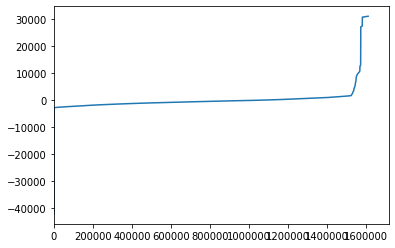

In [39]:
defi_credits.sort_values(by='days_credit_enddate',axis=0)['days_credit_enddate'].reset_index(drop=True).plot()

### 편향이 심하므로 median으로 채운다 

In [7]:
# nan 값 있는 열을 median으로 채움
defi_credits['days_credit_enddate']=defi_credits['days_credit_enddate'].fillna(defi_credits['days_credit_enddate'].median())
defi_credits['amt_credit_sum_debt']=defi_credits['amt_credit_sum_debt'].fillna(defi_credits['amt_credit_sum_debt'].median())
defi_credits['days_enddate_fact']=defi_credits['days_enddate_fact'].fillna(defi_credits['days_enddate_fact'].median())
defi_credits['amt_credit_sum_limit']=defi_credits['amt_credit_sum_limit'].fillna(defi_credits['amt_credit_sum_limit'].median())
defi_credits['amt_credit_sum']=defi_credits['amt_credit_sum'].fillna(defi_credits['amt_credit_sum'].median())
# nan 값이 70% 이상인 열 버림 
defi_credits=defi_credits.drop(['amt_credit_max_overdue','amt_annuity'],axis=1)
defi_credits

,application_id_current,defi_id,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,credit_active,credit_currency,credit_type
0,215354,5714462,-497,0,-153.0,-153.0,0,91323.00,0.0,0.0,0.0,-131,2,0,3
1,215354,5714463,-208,0,1075.0,-897.0,0,225000.00,171342.0,0.0,0.0,-20,0,0,4
2,215354,5714464,-203,0,528.0,-897.0,0,464323.50,0.0,0.0,0.0,-16,0,0,3
3,215354,5714465,-203,0,-330.0,-897.0,0,90000.00,0.0,0.0,0.0,-16,0,0,4
4,215354,5714466,-629,0,1197.0,-897.0,0,2700000.00,0.0,0.0,0.0,-21,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,-44,0,-30.0,-897.0,0,11250.00,11250.0,0.0,0.0,-19,0,0,10
1716424,100044,5057754,-2648,0,-2433.0,-2493.0,0,38130.84,0.0,0.0,0.0,-2493,2,0,3
1716425,100044,5057762,-1809,0,-1628.0,-970.0,0,15570.00,0.0,0.0,0.0,-967,2,0,3
1716426,246829,5057770,-1878,0,-1513.0,-1513.0,0,36000.00,0.0,0.0,0.0,-1508,2,0,3


In [41]:
defi_credits.isna().sum()

application_id_current    0
defi_id                   0
days_credit               0
credit_day_overdue        0
days_credit_enddate       0
days_enddate_fact         0
cnt_credit_prolong        0
amt_credit_sum            0
amt_credit_sum_debt       0
amt_credit_sum_limit      0
amt_credit_sum_overdue    0
days_credit_update        0
credit_active             0
credit_currency           0
credit_type               0
dtype: int64

## defi_credits_balance

In [42]:
defi_credits_balance.isna().sum()

defi_id           0
months_balance    0
status            0
dtype: int64

In [43]:
defi_credits[defi_credits['defi_id']==5715448]

,application_id_current,defi_id,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,credit_active,credit_currency,credit_type
768,380361,5715448,-820,0,31069.0,-897.0,0,67500.0,0.0,67500.0,0.0,-183,0,0,4


In [44]:
defi_credits_balance[defi_credits_balance['defi_id']==5715448]

,defi_id,months_balance,status
0,5715448,0,6
1,5715448,-1,6
2,5715448,-2,6
3,5715448,-3,6
4,5715448,-4,6
5,5715448,-5,6
6,5715448,-6,6
7,5715448,-7,6
8,5715448,-8,6
9,5715448,-9,0


In [46]:
defi_credits_balance['months_balance'].min()

-96

In [47]:
defi_credits_balance['status'].describe()

count    2.729992e+07
mean     4.513079e+00
std      2.851864e+00
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+00
75%      6.000000e+00
max      7.000000e+00
Name: status, dtype: float64

### defi_credits, defi_credits_balance를 defi_credits에 하나로 합치기 -> apply 시도했으나 못함
### 해당 코드는 삑남 merge도 시도했으나 삑남 -> 모든 날짜로 하지말고 축약하거나 잘라서 넣자

for i in range(len(defi_credits)):
    for j in range(len(defi_credits_balance)):
        if defi_credits['defi_id'][i]==defi_credits_balance['defi_id'][j]:
            defi_credits['months_balance'+str(defi_credits_balance['months_balance'])][i]=defi_credits_balance['status'][j]

In [52]:
defi_credits_balance.groupby('defi_id').mean()

,months_balance,status
defi_id,,
5001709,-48.0,6.113402
5001710,-41.0,6.000000
5001711,-1.5,1.750000
5001712,-9.0,2.842105
5001713,-10.5,7.000000
...,...,...
6842884,-23.5,5.270833
6842885,-11.5,2.500000
6842886,-16.0,4.545455


In [8]:
defi_merge=pd.merge(defi_credits,defi_credits_balance.groupby('defi_id').mean(),on='defi_id')

In [60]:
defi_merge

,application_id_current,defi_id,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,credit_active,credit_currency,credit_type,months_balance,status
0,380361,5715448,-820,0,31069.0,-897.0,0,67500.0,0.00,67500.00,0.0,-183,0,0,4,-13.0,4.592593
1,380361,5715449,-357,0,1119.0,-897.0,0,45000.0,0.00,45000.00,0.0,-130,0,0,4,-5.5,3.583333
2,380361,5715451,-917,0,-187.0,-759.0,0,74439.0,0.00,0.00,0.0,-748,2,0,3,-17.5,2.230769
3,380361,5715452,-993,0,31039.0,-831.0,0,315000.0,0.00,0.00,0.0,-818,2,0,4,-16.0,4.848485
4,380361,5715453,-1146,0,681.0,-780.0,0,2025000.0,0.00,0.00,0.0,-769,2,0,3,-18.5,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774349,229054,5053730,-456,0,1372.0,-897.0,0,67500.0,63530.46,3969.54,0.0,-3,0,0,4,-7.0,1.666667
774350,254479,5053734,-1571,0,986.0,-897.0,0,142294.5,0.00,0.00,0.0,-2,0,0,3,-25.5,5.192308
774351,363575,5053740,-1234,0,-503.0,-502.0,0,900000.0,0.00,0.00,0.0,-461,2,0,3,-20.0,6.439024
774352,245498,5053747,-2582,0,-2214.0,-2018.0,0,49495.5,0.00,0.00,0.0,-2017,2,0,3,-42.0,4.729412


In [9]:
df2=pd.merge(loan_application,defi_merge, on='application_id_current')
df2

,application_id_current,target,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,credit_active,credit_currency,credit_type,months_balance,status
0,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,40761.00,0.000,0.000,0.0,-1038,2,0,4,-25.5,0.909091
1,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.00,0.000,0.000,0.0,-47,2,0,4,-7.5,4.875000
2,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,135000.00,0.000,0.000,0.0,-1185,2,0,3,-39.5,2.437500
3,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,19071.00,0.000,0.000,0.0,-906,2,0,3,-28.5,2.437500
4,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,120735.00,0.000,0.000,0.0,-34,2,0,3,-19.5,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774349,456224,NaN,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731,...,49742.73,0.000,0.000,0.0,-2427,2,0,3,-44.5,5.333333
774350,456224,NaN,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731,...,14895.00,0.000,0.000,0.0,-1673,2,0,3,-44.0,4.617978
774351,456250,NaN,0,135000.0,312768.0,24709.5,270000.0,0.006629,-13962,-633,...,483349.50,0.000,0.000,0.0,-127,2,0,3,-16.0,4.545455
774352,456250,NaN,0,135000.0,312768.0,24709.5,270000.0,0.006629,-13962,-633,...,2153110.05,1840308.480,0.000,0.0,-23,0,0,3,-12.5,6.461538


In [66]:
df2=df2[df2['target'].isna()==False]
train_x, test_x, train_y, test_y = train_test_split(df2.drop(['target'],axis=1), df2['target'], test_size=0.3, random_state=123)
train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true = test_y, y_score = predict_test, pos_label = 1) #positive class is 1; negative class is 0
auroc = sklearn.metrics.auc(fpr, tpr)
auroc

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 0.0650218
[200]	valid_0's l2: 0.0593094
[300]	valid_0's l2: 0.0552616
[400]	valid_0's l2: 0.0521598
[500]	valid_0's l2: 0.0493981
[600]	valid_0's l2: 0.0471243
[700]	valid_0's l2: 0.0449979
[800]	valid_0's l2: 0.0432405
[900]	valid_0's l2: 0.0414973
[1000]	valid_0's l2: 0.0399257
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 0.0399257


0.9565143376193491

## defi_credits, defi_credits_balance를 합치고 계산하니 auroc가 0.956가량으로 보이나 과적합이 우려된다

## aave_loan_balance

In [64]:
aave_loan_balance.isna().sum()

application_id_previous            0
application_id_current             0
months_balance                     0
amt_balance                        0
amt_credit_limit_actual            0
amt_drawings_atm_current      749816
amt_drawings_current               0
amt_drawings_other_current    749816
amt_drawings_pos_current      749816
amt_inst_min_regularity       305236
amt_payment_current           767988
amt_payment_total_current          0
amt_receivable_principal           0
amt_recivable                      0
amt_total_receivable               0
cnt_drawings_atm_current      749816
cnt_drawings_current               0
cnt_drawings_other_current    749816
cnt_drawings_pos_current      749816
cnt_instalment_mature_cum     305236
sk_dpd                             0
sk_dpd_def                         0
name_contract_status               0
dtype: int64

In [67]:
len(aave_loan_balance) 

3840312

In [10]:
# median으로 결측값 채우기 
aave_loan_balance['amt_drawings_atm_current']=aave_loan_balance['amt_drawings_atm_current'].fillna(aave_loan_balance['amt_drawings_atm_current'].median())
aave_loan_balance['amt_drawings_other_current']=aave_loan_balance['amt_drawings_other_current'].fillna(aave_loan_balance['amt_drawings_other_current'].median())
aave_loan_balance['amt_drawings_pos_current']=aave_loan_balance['amt_drawings_pos_current'].fillna(aave_loan_balance['amt_drawings_pos_current'].median())
aave_loan_balance['amt_inst_min_regularity']=aave_loan_balance['amt_inst_min_regularity'].fillna(aave_loan_balance['amt_inst_min_regularity'].median())
aave_loan_balance['amt_payment_current']=aave_loan_balance['amt_payment_current'].fillna(aave_loan_balance['amt_payment_current'].median())
aave_loan_balance['cnt_drawings_atm_current']=aave_loan_balance['cnt_drawings_atm_current'].fillna(aave_loan_balance['cnt_drawings_atm_current'].median())
aave_loan_balance['cnt_drawings_other_current']=aave_loan_balance['cnt_drawings_other_current'].fillna(aave_loan_balance['cnt_drawings_other_current'].median())
aave_loan_balance['cnt_drawings_pos_current']=aave_loan_balance['cnt_drawings_pos_current'].fillna(aave_loan_balance['cnt_drawings_pos_current'].median())
aave_loan_balance['cnt_instalment_mature_cum']=aave_loan_balance['cnt_instalment_mature_cum'].fillna(aave_loan_balance['cnt_instalment_mature_cum'].median())

In [13]:
aave_loan_balance[aave_loan_balance['application_id_current']==378907]


,application_id_previous,application_id_current,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,...,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,sk_dpd,sk_dpd_def,name_contract_status
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,0,0,0
122799,2562384,378907,-30,45328.320,270000,0.0,0.000,0.0,0.000,2332.035,...,45670.275,45670.275,0.0,0,0.0,0.0,18.0,0,0,0
153474,2562384,378907,-8,129.240,135000,0.0,22005.000,0.0,22005.000,2250.000,...,0.000,0.000,0.0,1,0.0,1.0,33.0,0,0,0
330701,2562384,378907,-2,28.575,9000,0.0,0.000,0.0,0.000,1916.910,...,28.575,28.575,0.0,0,0.0,0.0,39.0,0,0,0
419198,2562384,378907,-12,0.000,45000,0.0,0.000,0.0,0.000,0.000,...,0.000,0.000,0.0,0,0.0,0.0,29.0,0,0,0
561468,2562384,378907,-39,56570.940,270000,0.0,0.000,0.0,0.000,2761.740,...,56570.940,56570.940,0.0,0,0.0,0.0,9.0,6,6,0
577279,2562384,378907,-27,43030.845,270000,0.0,0.000,0.0,0.000,2250.000,...,43360.290,43360.290,0.0,0,0.0,0.0,21.0,0,0,0
596084,2562384,378907,-19,0.000,45000,0.0,0.000,0.0,0.000,281.475,...,0.000,0.000,0.0,0,0.0,0.0,29.0,0,0,0
722949,2562384,378907,-13,0.000,45000,0.0,0.000,0.0,0.000,0.000,...,0.000,0.000,0.0,0,0.0,0.0,29.0,0,0,0
889286,2562384,378907,-17,0.000,45000,0.0,0.000,0.0,0.000,0.000,...,0.000,0.000,0.0,0,0.0,0.0,29.0,0,0,0


In [14]:
df3=pd.merge(df2,aave_loan_balance.groupby('application_id_current').mean(),on='application_id_current')
df3=pd.merge(df3,aave_loan_balance.groupby('application_id_current').sum(),on='application_id_current')
df3

,application_id_current,target,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,amt_recivable_y,amt_total_receivable_y,cnt_drawings_atm_current_y,cnt_drawings_current_y,cnt_drawings_other_current_y,cnt_drawings_pos_current_y,cnt_instalment_mature_cum_y,sk_dpd_y,sk_dpd_def_y,name_contract_status_y
0,100043,0.0,2,198000.0,641173.5,23157.0,553500.0,0.018850,-17199,-768,...,6877115.820,6877115.820,2.0,12,0.0,10.0,460.0,0,0,0
1,100043,0.0,2,198000.0,641173.5,23157.0,553500.0,0.018850,-17199,-768,...,6877115.820,6877115.820,2.0,12,0.0,10.0,460.0,0,0,0
2,100048,0.0,0,202500.0,604152.0,29196.0,540000.0,0.009175,-16971,-475,...,1865730.465,1865730.465,1.0,8,0.0,7.0,388.0,0,0,0
3,100050,0.0,0,108000.0,746280.0,42970.5,675000.0,0.010966,-23548,365243,...,0.000,0.000,0.0,0,0.0,0.0,0.0,0,0,0
4,100050,0.0,0,108000.0,746280.0,42970.5,675000.0,0.010966,-23548,365243,...,0.000,0.000,0.0,0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272221,456189,NaN,0,270000.0,360000.0,28570.5,360000.0,0.026392,-19397,-119,...,3057011.640,3057011.640,4.0,10,0.0,6.0,231.0,0,0,0
272222,456189,NaN,0,270000.0,360000.0,28570.5,360000.0,0.026392,-19397,-119,...,3057011.640,3057011.640,4.0,10,0.0,6.0,231.0,0,0,0
272223,456250,NaN,0,135000.0,312768.0,24709.5,270000.0,0.006629,-13962,-633,...,2066850.315,2066850.315,8.0,8,0.0,0.0,55.0,0,0,0
272224,456250,NaN,0,135000.0,312768.0,24709.5,270000.0,0.006629,-13962,-633,...,2066850.315,2066850.315,8.0,8,0.0,0.0,55.0,0,0,0


## application_previous

In [16]:
application_previous[application_previous['application_id_current']==378907]

,application_id_previous,application_id_current,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,hour_appr_process_start,nflag_last_appl_in_day,rate_down_payment,...,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,name_seller_industry,name_yield_group,product_combination
105263,1095902,378907,14176.080,276507.0,313006.5,0.0,276507.0,8,1,0.0,...,7,1,2,2,3,0,4,4,2,10
756786,2562384,378907,13500.000,0.0,270000.0,NaN,NaN,8,1,NaN,...,7,7,2,27,0,2,5,10,0,1
1036575,2150399,378907,5469.705,121279.5,121279.5,0.0,121279.5,16,1,0.0,...,7,6,0,5,3,0,4,4,2,10


In [17]:
application_previous.isna().sum()

application_id_previous              0
application_id_current               0
amt_annuity                     372235
amt_application                      0
amt_credit                           1
amt_down_payment                895844
amt_goods_price                 385515
hour_appr_process_start              0
nflag_last_appl_in_day               0
rate_down_payment               895844
rate_interest_primary          1664263
rate_interest_privileged       1664263
days_decision                        0
sellerplace_area                     0
cnt_payment                     372230
days_first_drawing              673065
days_first_due                  673065
days_last_due_1st_version       673065
days_last_due                   673065
days_termination                673065
nflag_insured_on_approval       673065
name_contract_type                   0
weekday_appr_process_start           0
flag_last_appl_per_contract          0
name_cash_loan_purpose               0
name_contract_status     

In [21]:
len(application_previous)

1670214

In [22]:
# median으로 결측값 채우기 
application_previous['amt_annuity']=application_previous['amt_annuity'].fillna(application_previous['amt_annuity'].median())
application_previous['amt_credit']=application_previous['amt_credit'].fillna(application_previous['amt_credit'].median())
application_previous['amt_down_payment']=application_previous['amt_down_payment'].fillna(application_previous['amt_down_payment'].median())
application_previous['amt_goods_price']=application_previous['amt_goods_price'].fillna(application_previous['amt_goods_price'].median())
application_previous['rate_down_payment']=application_previous['rate_down_payment'].fillna(application_previous['rate_down_payment'].median())
application_previous['cnt_payment']=application_previous['cnt_payment'].fillna(application_previous['cnt_payment'].median())
application_previous['days_first_drawing']=application_previous['days_first_drawing'].fillna(application_previous['days_first_drawing'].median())
application_previous['days_first_due']=application_previous['days_first_due'].fillna(application_previous['days_first_due'].median())
application_previous['days_last_due_1st_version']=application_previous['days_last_due_1st_version'].fillna(application_previous['days_last_due_1st_version'].median())
application_previous['days_last_due']=application_previous['days_last_due'].fillna(application_previous['days_last_due'].median())
application_previous['days_termination']=application_previous['days_termination'].fillna(application_previous['days_termination'].median())
application_previous['nflag_insured_on_approval']=application_previous['nflag_insured_on_approval'].fillna(application_previous['nflag_insured_on_approval'].median())
# nan 값이 70% 이상인 열 버림 
application_previous=application_previous.drop(['rate_interest_primary','rate_interest_privileged'],axis=1)
application_previous

,application_id_previous,application_id_current,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,hour_appr_process_start,nflag_last_appl_in_day,rate_down_payment,...,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,name_seller_industry,name_yield_group,product_combination
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,1,0.000000,...,7,7,2,19,3,0,4,2,4,13
1,2802425,108129,25188.615,607500.0,679671.0,1638.0,607500.0,11,1,0.051605,...,7,6,2,27,2,2,3,10,2,7
2,2523466,122040,15060.735,112500.0,136444.5,1638.0,112500.0,11,1,0.051605,...,7,5,2,27,2,2,5,10,1,6
3,2819243,176158,47041.335,450000.0,470790.0,1638.0,450000.0,7,1,0.051605,...,7,7,2,27,2,2,5,10,4,8
4,1784265,202054,31924.395,337500.0,404055.0,1638.0,337500.0,9,1,0.051605,...,1,7,2,27,2,1,5,10,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,14704.290,267295.5,311400.0,0.0,267295.5,12,1,0.000000,...,7,7,1,11,3,0,7,5,3,11
1670210,2357031,334635,6622.020,87750.0,64291.5,29250.0,87750.0,15,1,0.340554,...,7,6,0,11,3,0,7,5,4,11
1670211,2659632,249544,11520.855,105237.0,102523.5,10525.5,105237.0,12,1,0.101401,...,7,5,2,7,3,0,4,4,3,9
1670212,2785582,400317,18821.520,180000.0,191880.0,1638.0,180000.0,9,1,0.051605,...,7,1,2,27,2,2,0,10,3,7


In [23]:
df4=pd.merge(df3,application_previous.groupby('application_id_current').sum(),on='application_id_current')
df4=pd.merge(df4,application_previous.groupby('application_id_current').mean(),on='application_id_current')
df4

,application_id_current,target,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,code_reject_reason_y,name_type_suite_y,name_client_type_y,name_goods_category_y,name_portfolio_y,name_product_type_y,channel_type_y,name_seller_industry_y,name_yield_group_y,product_combination_y
0,100043,0.0,2,198000.0,641173.5,23157.0,553500.0,0.018850,-17199,-768,...,4.000000,5.555556,2.111111,17.222222,2.444444,0.666667,5.222222,6.888889,2.888889,9.333333
1,100043,0.0,2,198000.0,641173.5,23157.0,553500.0,0.018850,-17199,-768,...,4.000000,5.555556,2.111111,17.222222,2.444444,0.666667,5.222222,6.888889,2.888889,9.333333
2,100048,0.0,0,202500.0,604152.0,29196.0,540000.0,0.009175,-16971,-475,...,7.000000,6.750000,1.500000,27.000000,2.000000,1.250000,5.000000,10.000000,1.750000,4.250000
3,100050,0.0,0,108000.0,746280.0,42970.5,675000.0,0.010966,-23548,365243,...,7.000000,6.333333,1.333333,23.666667,2.333333,0.666667,4.666667,8.666667,0.666667,5.666667
4,100050,0.0,0,108000.0,746280.0,42970.5,675000.0,0.010966,-23548,365243,...,7.000000,6.333333,1.333333,23.666667,2.333333,0.666667,4.666667,8.666667,0.666667,5.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270130,456189,NaN,0,270000.0,360000.0,28570.5,360000.0,0.026392,-19397,-119,...,4.818182,4.818182,1.818182,22.909091,2.727273,0.909091,4.363636,8.909091,1.181818,5.181818
270131,456189,NaN,0,270000.0,360000.0,28570.5,360000.0,0.026392,-19397,-119,...,4.818182,4.818182,1.818182,22.909091,2.727273,0.909091,4.363636,8.909091,1.181818,5.181818
270132,456250,NaN,0,135000.0,312768.0,24709.5,270000.0,0.006629,-13962,-633,...,6.250000,6.625000,1.750000,23.250000,2.750000,0.750000,4.875000,8.250000,1.000000,5.000000
270133,456250,NaN,0,135000.0,312768.0,24709.5,270000.0,0.006629,-13962,-633,...,6.250000,6.625000,1.750000,23.250000,2.750000,0.750000,4.875000,8.250000,1.000000,5.000000


## payments_history

In [25]:
payments_history.isna().sum()# num_instalment_number 기준으로 합치기 

application_id_previous       0
application_id_current        0
num_instalment_version        0
num_instalment_number         0
days_instalment               0
days_entry_payment         2905
amt_instalment                0
amt_payment                2905
dtype: int64

In [26]:
len(payments_history)

13605401

In [29]:
# median으로 결측값 채우기 
payments_history['days_entry_payment']=payments_history['days_entry_payment'].fillna(payments_history['days_entry_payment'].median())
payments_history['amt_payment']=payments_history['amt_payment'].fillna(payments_history['amt_payment'].median())

In [28]:
payments_history[payments_history['application_id_current']==378907]

,application_id_previous,application_id_current,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
7640824,2562384,378907,0.0,42,-821.0,-822.0,2250.000,2250.000
7741051,2562384,378907,0.0,18,-1187.0,-1181.0,2761.740,2761.740
7748571,2562384,378907,0.0,14,-1247.0,-1247.0,233.550,233.550
7779952,2150399,378907,1.0,12,-1207.0,-1246.0,5469.705,1015.245
7830654,2562384,378907,0.0,31,-1006.0,-1006.0,344.385,344.385
...,...,...,...,...,...,...,...,...
11352964,2562384,378907,0.0,72,-153.0,-153.0,840.780,840.780
11367826,1095902,378907,1.0,10,-786.0,-816.0,14176.080,1803.735
11369832,2150399,378907,1.0,18,-1027.0,-1029.0,5469.705,5469.705
11387488,2562384,378907,0.0,37,-913.0,-913.0,142.965,142.965


In [30]:
df5=pd.merge(df4,payments_history.groupby('application_id_current').mean(),on='application_id_current')
df5=pd.merge(df5,payments_history.groupby('application_id_current').sum(),on='application_id_current')
df5

,application_id_current,target,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,days_entry_payment_x,amt_instalment_x,amt_payment_x,application_id_previous_y,num_instalment_version_y,num_instalment_number_y,days_instalment_y,days_entry_payment_y,amt_instalment_y,amt_payment_y
0,100043,0.0,2,198000.0,641173.5,23157.0,553500.0,0.018850,-17199,-768,...,-894.142857,16935.941688,16248.416494,141514976,36.0,1243,-67236.0,-68849.0,1304067.510,1251128.070
1,100043,0.0,2,198000.0,641173.5,23157.0,553500.0,0.018850,-17199,-768,...,-894.142857,16935.941688,16248.416494,141514976,36.0,1243,-67236.0,-68849.0,1304067.510,1251128.070
2,100048,0.0,0,202500.0,604152.0,29196.0,540000.0,0.009175,-16971,-475,...,-449.850746,28339.361866,28339.361866,75652701,16.0,1449,-29858.0,-30140.0,1898737.245,1898737.245
3,100050,0.0,0,108000.0,746280.0,42970.5,675000.0,0.010966,-23548,365243,...,-245.812500,10282.446562,10282.446562,35895424,17.0,136,-3744.0,-3933.0,164519.145,164519.145
4,100050,0.0,0,108000.0,746280.0,42970.5,675000.0,0.010966,-23548,365243,...,-245.812500,10282.446562,10282.446562,35895424,17.0,136,-3744.0,-3933.0,164519.145,164519.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269833,456189,NaN,0,270000.0,360000.0,28570.5,360000.0,0.026392,-19397,-119,...,-580.186667,5951.235000,5727.646200,102922659,26.0,1366,-43000.0,-43514.0,446342.625,429573.465
269834,456189,NaN,0,270000.0,360000.0,28570.5,360000.0,0.026392,-19397,-119,...,-580.186667,5951.235000,5727.646200,102922659,26.0,1366,-43000.0,-43514.0,446342.625,429573.465
269835,456250,NaN,0,135000.0,312768.0,24709.5,270000.0,0.006629,-13962,-633,...,-365.760000,13238.063100,13044.983400,83421479,27.0,400,-17879.0,-18288.0,661903.155,652249.170
269836,456250,NaN,0,135000.0,312768.0,24709.5,270000.0,0.006629,-13962,-633,...,-365.760000,13238.063100,13044.983400,83421479,27.0,400,-17879.0,-18288.0,661903.155,652249.170


In [39]:
# df3
df3_1=df3[df3['target'].isna()==False]
train_x, test_x, train_y, test_y = train_test_split(df3_1.drop(['target'],axis=1), df3_1['target'], test_size=0.3, random_state=123)
train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true = test_y, y_score = predict_test, pos_label = 1) #positive class is 1; negative class is 0
auroc = sklearn.metrics.auc(fpr, tpr)
auroc

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 0.0577056
[200]	valid_0's l2: 0.0461449
[300]	valid_0's l2: 0.038899
[400]	valid_0's l2: 0.033661
[500]	valid_0's l2: 0.0295363
[600]	valid_0's l2: 0.0263514
[700]	valid_0's l2: 0.0238496
[800]	valid_0's l2: 0.021712
[900]	valid_0's l2: 0.0200316
[1000]	valid_0's l2: 0.0186542
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 0.0186542


0.994815965106237

In [40]:
# df4
df4_1=df4[df4['target'].isna()==False]
train_x, test_x, train_y, test_y = train_test_split(df4_1.drop(['target'],axis=1), df4_1['target'], test_size=0.3, random_state=123)
train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true = test_y, y_score = predict_test, pos_label = 1) #positive class is 1; negative class is 0
auroc = sklearn.metrics.auc(fpr, tpr)
auroc

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 0.0567515
[200]	valid_0's l2: 0.0443596
[300]	valid_0's l2: 0.0362996
[400]	valid_0's l2: 0.0306656
[500]	valid_0's l2: 0.0264601
[600]	valid_0's l2: 0.0232019
[700]	valid_0's l2: 0.0206095
[800]	valid_0's l2: 0.0186307
[900]	valid_0's l2: 0.0169842
[1000]	valid_0's l2: 0.0156065
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 0.0156065


0.9948588904644621

In [153]:
# df5
df5_1=df5[df5['target'].isna()==False]
train_x, test_x, train_y, test_y = train_test_split(df5_1.drop(['target'],axis=1), df5_1['target'], test_size=0.3, random_state=123)
train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true = test_y, y_score = predict_test, pos_label = 1) #positive class is 1; negative class is 0
auroc = sklearn.metrics.auc(fpr, tpr)
auroc

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 0.0552085
[200]	valid_0's l2: 0.0427132
[300]	valid_0's l2: 0.03466
[400]	valid_0's l2: 0.0291692
[500]	valid_0's l2: 0.0250665
[600]	valid_0's l2: 0.021726
[700]	valid_0's l2: 0.0192685
[800]	valid_0's l2: 0.0172559
[900]	valid_0's l2: 0.0156765
[1000]	valid_0's l2: 0.0143327
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 0.0143327


0.9957447656712075

## <피쳐 추가별 auroc>

### df1 -> 0.757
### df2 -> 0.956
### df3 -> 0.99481
### df4 -> 0.99485
### df5 -> 0.995


## 피쳐가 추가될수록 성능이 향상되는 모습을 보인다

## 오버피팅이 우려되므로 regulization을 실시한다

## object얼마나 있나 확인-> 임베딩 시킬건지 버릴건지 확인

In [31]:
df5.info()# object 없음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269838 entries, 0 to 269837
Columns: 265 entries, application_id_current to amt_payment_y
dtypes: float64(170), int64(95)
memory usage: 547.6 MB


In [57]:
df5.isna().sum()

application_id_current         0
target                     91140
col_2                          0
col_3                          0
col_4                          0
                           ...  
num_instalment_number_y        0
days_instalment_y              0
days_entry_payment_y           0
amt_instalment_y               0
amt_payment_y                  0
Length: 265, dtype: int64

## Regularization 적용전에 ridge와 lasso 비교

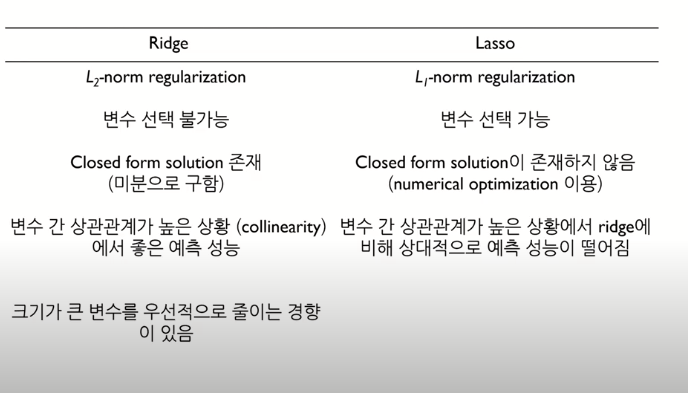

https://rk1993.tistory.com/entry/Ridge-regression%EC%99%80-Lasso-regression-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0

## lgbm같은 부스팅 모델은 L1,L2 로 feature selction을 해주지 않아도 하이퍼 파리미터를 통해 regulrization을 해줄 수 있음 

https://datascience.stackexchange.com/questions/57255/l1-l2-regularization-in-light-gbm

## imbalanced 해결, PCA -> 성능이 잘나와서 굳이 필요 없을듯!?

### imbalanced -> 예전에 했던 내 깃 참고 https://github.com/Jangsehawn/OnTheLook_-/blob/main/%EB%B9%85%EB%8D%B0%EC%9E%90_OnTheLook_%EC%83%81%EC%9C%84%EC%9C%A0%EC%A0%80%EC%9D%B4%ED%83%88%EC%98%88%EC%B8%A1%EB%AA%A8%EB%8D%B8%EB%A7%81_ver4(original).ipynb

# grid search로 hyperparameter 최적화

http://egloos.zum.com/incredible/v/7479081 # 베이지안 옵티마이제이션을 활용한 최적화

In [125]:
from sklearn.model_selection import GridSearchCV

In [149]:


params = {
    'num_leaves': [10, 30, 50],
    'max_depth': [-1, 3, 5],
    'min_data_in_leaf': [30, 50, 100, 300],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
}

grid = GridSearchCV(lgb.LGBMRegressor(random_state=0), params, scoring='r2', cv=5)
grid.fit(train_x, train_y)

reg = lgb.LGBMRegressor(random_state=0)
reg.fit(train_x,y_train_y)

lgbm_tuned = grid.best_estimator_

r2_tuned = grid.best_params_
r2_regular = r2_score(train_y, reg.predict(train_x))

KeyboardInterrupt: 

In [ ]:
pr, tpr, thresholds = sklearn.metrics.roc_curve(y_true = test_y, y_score = reg.predict(train_x), pos_label = 1) #positive class is 1; negative class is 0
auroc = sklearn.metrics.auc(fpr, tpr)
auroc

## 하이퍼 파라미터 튜닝에 시간소요가 심해서 기한내에 제출하지 못함 

## 기존에 auroc가 가장 좋았던 df5로 피팅하여 제출

In [166]:
df= pd.DataFrame(columns = ['application_id_current', 'target'])
df

,application_id_current,target


In [156]:
y_hat=model.predict(df5[df5['target'].isna()].drop(['target'],axis=1))

In [162]:
y_hat

array([0.00517752, 0.00342806, 0.00312696, ..., 0.24405879, 0.24956232,
       0.24956232])

In [164]:
df5[df5['target'].isna()]['application_id_current'].reset_index(drop=True)

0        100013
1        100013
2        100013
3        100013
4        100028
          ...  
91135    456189
91136    456189
91137    456250
91138    456250
91139    456250
Name: application_id_current, Length: 91140, dtype: int64

In [167]:
df['application_id_current']=df5[df5['target'].isna()]['application_id_current'].reset_index(drop=True)
df['target']=y_hat

In [168]:
df

,application_id_current,target
0,100013,0.005178
1,100013,0.003428
2,100013,0.003127
3,100013,0.005178
4,100028,0.070088
...,...,...
91135,456189,0.124071
91136,456189,0.124071
91137,456250,0.244059
91138,456250,0.249562


In [169]:
# 결과저장
df.to_csv('E:/nft_bank 분석과제/nftbank_loan/Result.csv')